In [8]:
filepath = "test_data/phen.wfn"

include("../wfn.jl");
include("../ext21.jl");

using Plots
using LaTeXStrings
using Plots.PlotMeasures

# Plotting the electronic density using the provided function.

In [9]:
f = read_wfn(filepath, device = cpu);

get_electronic_density([0 0 0], f)

1-element Vector{Float32}:
 0.0

┌ Info: Saved animation to 
│   fn = /home/mario/Documents/Repositories/ext94_refactor/examples/anim_fps20.gif
└ @ Plots /home/mario/.julia/packages/Plots/CBYO0/src/animation.jl:114


Plots.AnimatedGif("/home/mario/Documents/Repositories/ext94_refactor/examples/anim_fps20.gif")
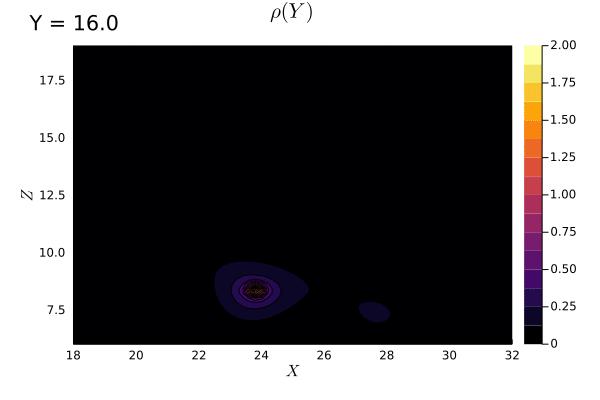

In [10]:
z = 6:0.2:19
x = 18:0.2:32

anim = @animate for y ∈ 16:0.1:28
    fu(x, z) = begin
        get_electronic_density(Float32.([x y z]), f)[1]
    end
   contour(x, z, fu, clim=(0,2), fill = true, margin = 20px)
   title!(L"\rho(Y)")
   ylabel!(L"Z")
   xlabel!(L"X")
    
   annotate!(18,20,"Y = $y", halign=:left, family="monospace")
end
gif(anim, "anim_fps20.gif", fps = 20)

# Plotting the electronic density Laplacian using the provided function.

In [11]:
get_electronic_density_laplacian([0 0 0], f)

1-element Vector{Float64}:
 1.6479916114245475e-71

┌ Info: Saved animation to 
│   fn = /home/mario/Documents/Repositories/ext94_refactor/examples/anim_fps20_2.gif
└ @ Plots /home/mario/.julia/packages/Plots/CBYO0/src/animation.jl:114


Plots.AnimatedGif("/home/mario/Documents/Repositories/ext94_refactor/examples/anim_fps20_2.gif")
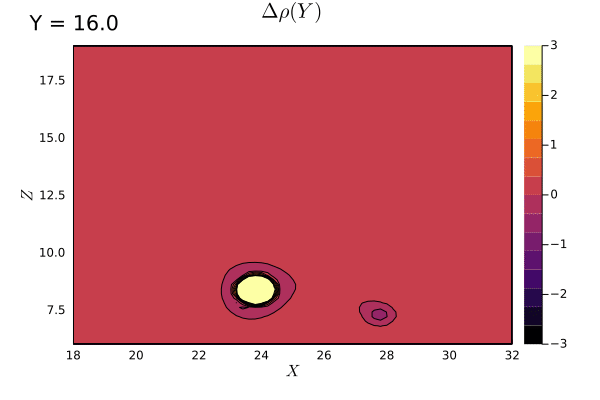

In [12]:
anim = @animate for y ∈ 16:0.1:28
    fu(x, z) = begin
        get_electronic_density_laplacian(Float32.([x y z]), f)[1]
    end
   contour(x, z, fu, clim=(-3,3), fill = true, margin = 20px)
   title!(L"\Delta\rho(Y)")
   ylabel!(L"Z")
   xlabel!(L"X")

   annotate!(18,20,"Y = $y", halign=:left, family="monospace")
end
gif(anim, "anim_fps20_2.gif", fps = 20)